In [ ]:
!pip install mne
!pip install sklearn
!pip install matplotlib
!pip install torch 
!pip install torchvision
!pip install tensorboardX
!pip install torchviz

In [ ]:
from collections import OrderedDict
from pylab import rcParams
import torch
import torch.nn as nn
import torchvision.transforms
import matplotlib.pyplot as plt
import numpy as np
import mne
from sklearn.preprocessing import RobustScaler

In [ ]:
torch.manual_seed(40)

In [ ]:
# Initialize parameters
eeg_sample_count = 480 
learning_rate = 1e-3 
eeg_sample_length = 226 
number_of_classes = 1 
hidden1 = 500 
hidden2 = 1000 
hidden3 = 100 
output = 10 

In [ ]:
## Create sample data using the parameters
sample_positives = [None, None] 
sample_positives[0] = torch.rand(int(eeg_sample_count / 2), eeg_sample_length) * 0.50 + 0.25
sample_positives[1] = torch.ones([int(eeg_sample_count / 2), 1], dtype=torch.float32)

sample_negatives = [None, None] 
sample_negatives_low = torch.rand(int(eeg_sample_count / 4), eeg_sample_length) * 0.25
sample_negatives_high = torch.rand(int(eeg_sample_count / 4), eeg_sample_length) * 0.25 + 0.75
sample_negatives[0] = torch.cat([sample_negatives_low, sample_negatives_high], dim = 0)
sample_negatives[1] = torch.zeros([int(eeg_sample_count / 2), 1], dtype=torch.float32)

samples = [None, None] 
samples[0] = torch.cat([sample_positives[0], sample_negatives[0]], dim = 0)
samples[1] = torch.cat([sample_positives[1], sample_negatives[1]], dim = 0)

## Create test data that isn't trained on
test_positives = torch.rand(10, eeg_sample_length) * 0.50 + 0.25 
test_negatives_low = torch.rand(5, eeg_sample_length) * 0.25 
test_negatives_high = torch.rand(5, eeg_sample_length) * 0.25 + 0.75 
test_negatives = torch.cat([test_negatives_low, test_negatives_high], dim = 0)


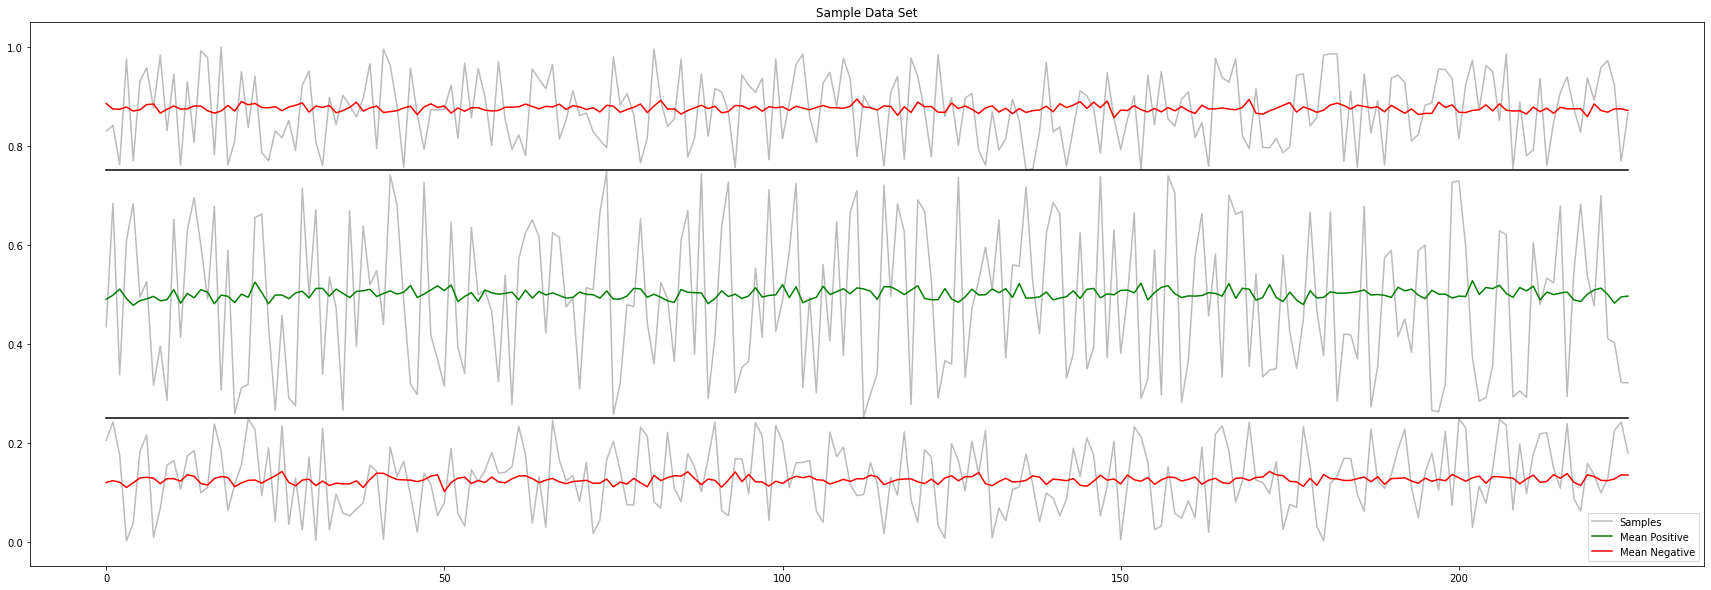

In [ ]:
rcParams['figure.figsize'] = 30, 10

plt.title("Sample Data Set")
plt.plot(list(range(0, eeg_sample_length)), sample_positives[0][0], color = "#bbbbbb", label = "Samples")
plt.plot(list(range(0, eeg_sample_length)), sample_positives[0].mean(dim = 0), color = "g", label = "Mean Positive")
plt.plot(list(range(0, eeg_sample_length)), sample_negatives_high[0], color = "#bbbbbb")
plt.plot(list(range(0, eeg_sample_length)), sample_negatives_high.mean(dim = 0), color = "r", label = "Mean Negative")
plt.plot(list(range(0, eeg_sample_length)), sample_negatives_low[0], color = "#bbbbbb")
plt.plot(list(range(0, eeg_sample_length)), sample_negatives_low.mean(dim = 0), color = "r")
plt.plot(list(range(0, eeg_sample_length)), [0.75] * eeg_sample_length, color = "k")
plt.plot(list(range(0, eeg_sample_length)), [0.25] * eeg_sample_length, color = "k")
plt.legend()
plt.show()

In [ ]:
## Define the network
tutorial_model = nn.Sequential()


tutorial_model.add_module('Input Linear', nn.Linear(eeg_sample_length, hidden1))
tutorial_model.add_module('Input Activation', nn.CELU()) 


tutorial_model.add_module('Hidden Linear', nn.Linear(hidden1, hidden2))
tutorial_model.add_module('Hidden Activation', nn.ReLU())


tutorial_model.add_module('Hidden Linear2', nn.Linear(hidden2, hidden3))
tutorial_model.add_module('Hidden Activation2', nn.ReLU())

tutorial_model.add_module('Hidden Linear3', nn.Linear(hidden3, 10))
tutorial_model.add_module('Hidden Activation3', nn.ReLU())


tutorial_model.add_module('Output Linear', nn.Linear(10, number_of_classes))
tutorial_model.add_module('Output Activation', nn.Sigmoid())

In [ ]:
# Define a loss function
loss_function = torch.nn.MSELoss()

def train_network(train_data, actual_class, iterations):

  loss_data = []

  for i in range(iterations):

    classification = tutorial_model(train_data)
    loss = loss_function(classification, actual_class)
    loss_data.append(loss)

    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

  rcParams['figure.figsize'] = 10, 5
  plt.title("Loss vs Iterations")
  plt.plot(list(range(0, len(loss_data))), loss_data)
  plt.show()

torch.save(tutorial_model, "/home/tutorial_model_default_state")

Below is the loss graph for our training session


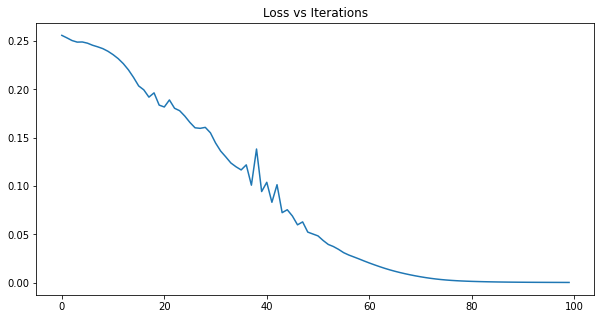

In [ ]:
tutorial_model = torch.load("/home/tutorial_model_default_state")

optimizer = torch.optim.Adam(tutorial_model.parameters(), lr = learning_rate)

print("Below is the loss graph for our training session")
train_network(samples[0], samples[1], iterations = 100)

Positive Test 1 Value scored: 98.74%
Positive Test 2 Value scored: 99.11%
Positive Test 3 Value scored: 99.33%
Positive Test 4 Value scored: 98.40%
Positive Test 5 Value scored: 98.40%
Positive Test 6 Value scored: 98.61%
Positive Test 7 Value scored: 98.68%
Positive Test 8 Value scored: 98.98%
Positive Test 9 Value scored: 98.33%
Positive Test 10 Value scored: 98.61%

Negative Test 1 Value scored: 2.72%
Negative Test 2 Value scored: 3.63%
Negative Test 3 Value scored: 3.13%
Negative Test 4 Value scored: 3.83%
Negative Test 5 Value scored: 3.99%
Negative Test 6 Value scored: 0.72%
Negative Test 7 Value scored: 0.62%
Negative Test 8 Value scored: 0.82%
Negative Test 9 Value scored: 0.71%
Negative Test 10 Value scored: 0.79%



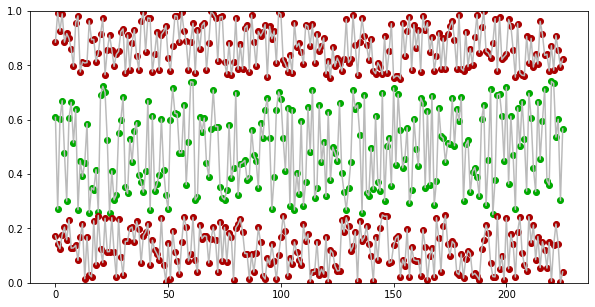

In [ ]:
# Classify our positive test dataset
predicted_positives = tutorial_model(test_positives).data.tolist()

# Print the results
for index, value in enumerate(predicted_positives):
  print("Positive Test {1} Value scored: {0:.2f}%".format(value[0] * 100, index + 1))

print()

#Classify the negative test dataset
predicted_negatives = tutorial_model(test_negatives).data.tolist()

# Print the results
for index, value in enumerate(predicted_negatives):
  print("Negative Test {1} Value scored: {0:.2f}%".format(value[0] * 100, index + 1))

print()

rcParams['figure.figsize'] = 10, 5
plt.scatter(list(range(0, eeg_sample_length)), test_positives[3], color = "#00aa00")
plt.plot(list(range(0, eeg_sample_length)), test_positives[3], color = "#bbbbbb")
plt.scatter(list(range(0, eeg_sample_length)), test_negatives[0], color = "#aa0000")
plt.plot(list(range(0, eeg_sample_length)), test_negatives[0], color = "#bbbbbb")
plt.scatter(list(range(0, eeg_sample_length)), test_negatives[9], color = "#aa0000")
plt.plot(list(range(0, eeg_sample_length)), test_negatives[9], color = "#bbbbbb")
plt.ylim([0 , 1])
plt.show()

In [ ]:
data_path = mne.datasets.sample.data_path()
data_path

'/root/mne_data/MNE-sample-data'

In [ ]:
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
event_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw-eve.fif'

raw_data = mne.io.read_raw_fif(raw_fname, preload=True) 

raw_data.set_eeg_reference()

Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Reading 0 ... 41699  =      0.000 ...   277.709 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Removing existing average EEG reference projection.
Created an SSP operator (subspace dimension = 3)


<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~122.9 MB, data loaded>

In [ ]:
raw_data = raw_data.pick(picks=["eeg","eog"])
picks_eeg_only = mne.pick_types(raw_data.info, 
                                eeg=True, 
                                eog=True, 
                                meg=False, 
                                exclude='bads')

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>


Effective window size : 13.639 (s)


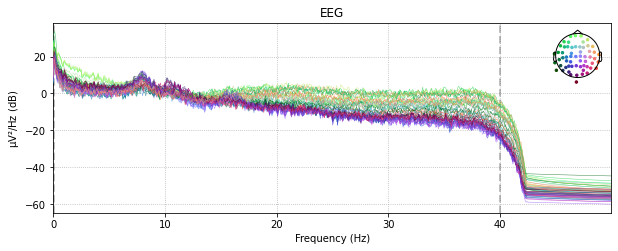

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


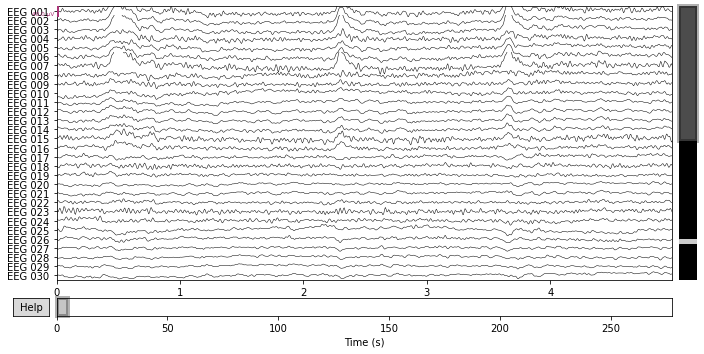

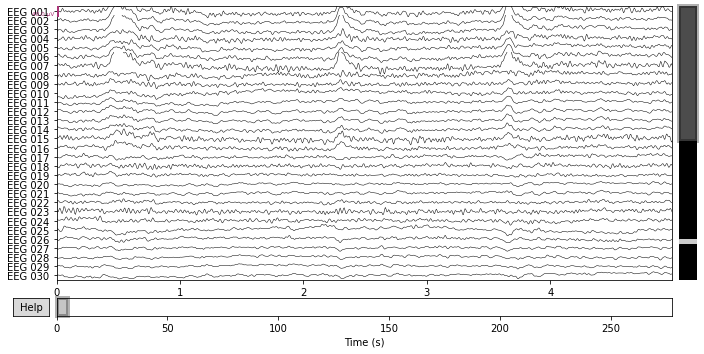

In [ ]:
raw_data.plot_psd(fmax=50)
raw_data.plot(duration=5, n_channels=30)

Fitting ICA to data using 59 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 4.1s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


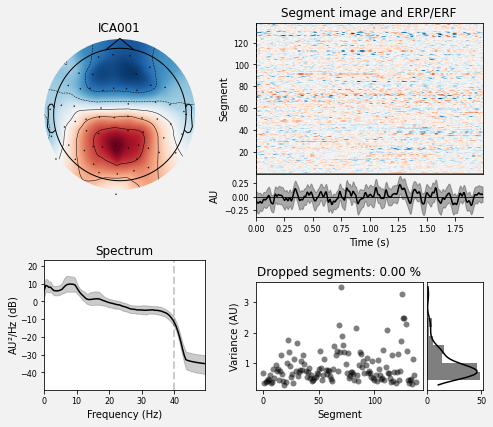

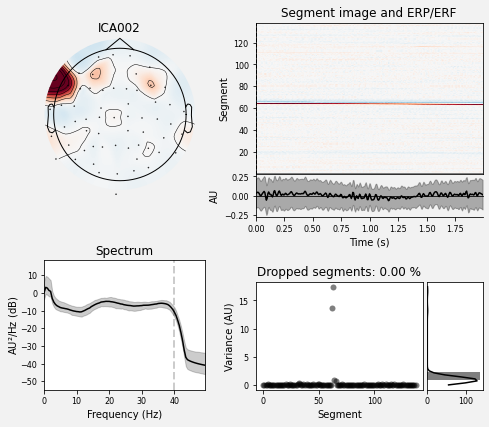

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [ ]:
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw_data)
ica.exclude = [1, 2] 
ica.plot_properties(raw_data, picks=ica.exclude)

In [ ]:
events = mne.read_events(event_fname)
event_id = 5
tmin = -0.5 
tmax = 1
epochs = mne.Epochs(raw_data, events, event_id, tmin, tmax, proj=True,
                    picks=picks_eeg_only, baseline=(None, 0), preload=True,
                    reject=dict(eeg=100e-6, eog=150e-6), verbose = False)
print(epochs)

<Epochs |  12 events (all good), -0.499488 - 0.998976 sec, baseline -0.499488 – 0 sec, ~4.2 MB, data loaded,
 '5': 12>


combining channels using "gfp"


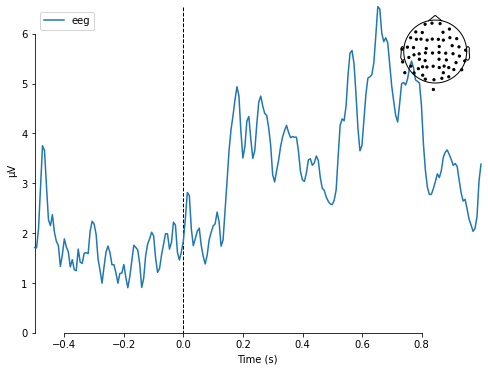

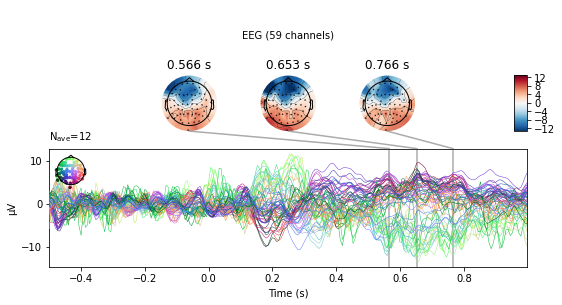

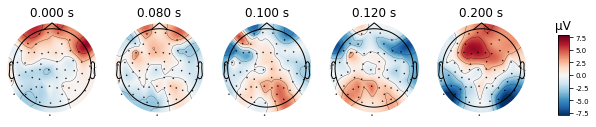

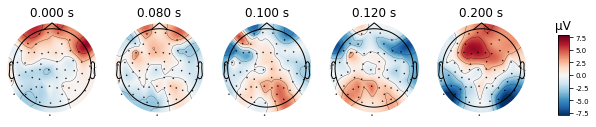

In [ ]:
eeg_evoked = epochs.average()

mne.viz.plot_compare_evokeds(dict(eeg=eeg_evoked),
                             legend='upper left', show_sensors='upper right')

eeg_evoked.plot_joint(picks='eeg')
eeg_evoked.plot_topomap(times=[0., 0.08, 0.1, 0.12, 0.2], ch_type='eeg')

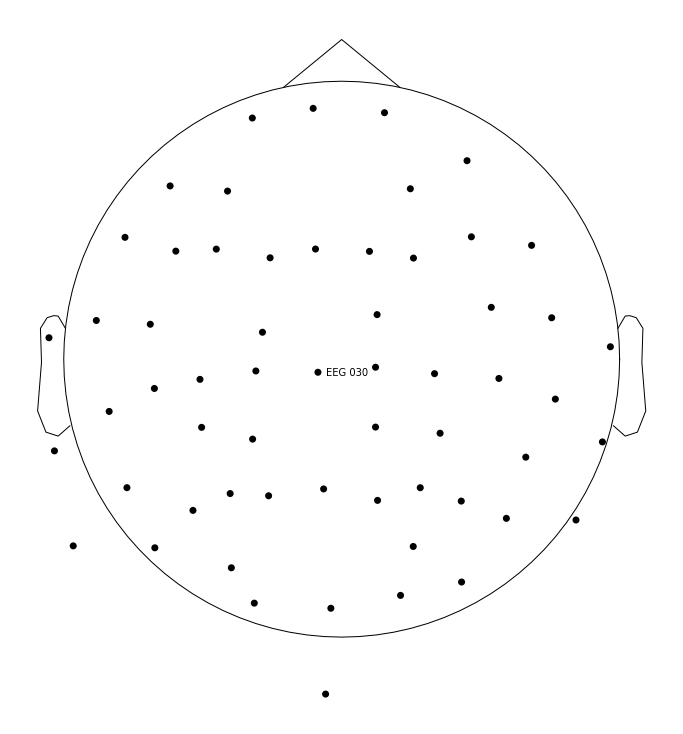

In [ ]:
# This is the channel used to monitor the P300 response
channel = "EEG 030"

# Display a graph of the sensor position we're using
sensor_position_figure = epochs.plot_sensors(show_names=[channel])

Not setting metadata
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


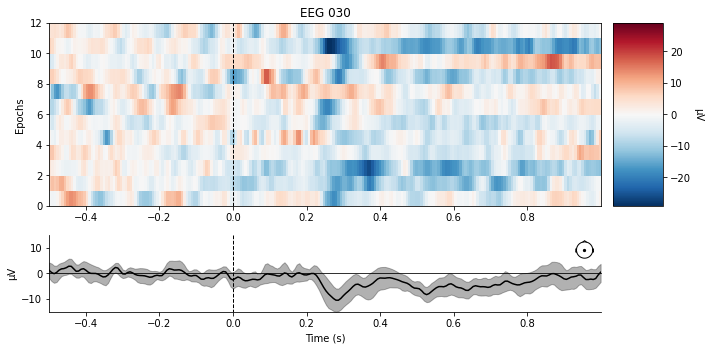

[<Figure size 720x360 with 4 Axes>]

In [ ]:
epochs.plot_image(picks=channel)

In [ ]:
event_id=[1,2,3,4]
epochsNoP300 = mne.Epochs(raw_data, events, event_id, tmin, tmax, proj=True,
                    picks=picks_eeg_only, baseline=(None, 0), preload=True,
                    reject=dict(eeg=100e-6, eog=150e-6), verbose = False)
print(epochsNoP300)

<Epochs |  208 events (all good), -0.499488 - 0.998976 sec, baseline -0.499488 – 0 sec, ~24.5 MB, data loaded,
 '1': 47
 '2': 56
 '3': 57
 '4': 48>


Not setting metadata
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


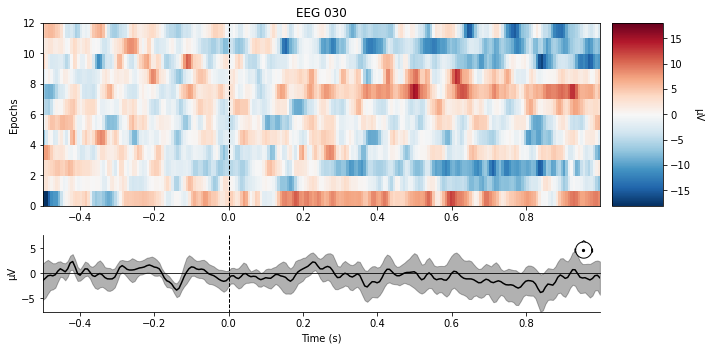

[<Figure size 720x360 with 4 Axes>]

In [ ]:
epochsNoP300[0:12].plot_image(picks=channel)

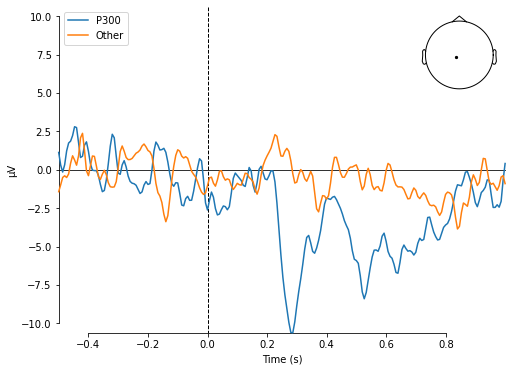

[<Figure size 576x432 with 2 Axes>]

In [ ]:
mne.viz.plot_compare_evokeds({'P300': epochs.average(picks=channel), 'Other': epochsNoP300[0:12].average(picks=channel)})

In [ ]:
eeg_data_scaler = RobustScaler()

p300s = np.squeeze(epochs.get_data(picks=channel))

others = np.squeeze(epochsNoP300.get_data(picks=channel))

p300s = p300s.transpose()
p300s = eeg_data_scaler.fit_transform(p300s)
p300s = p300s.transpose()

others = others.transpose()
others = eeg_data_scaler.fit_transform(others)
others = others.transpose()

p300s_train = p300s[0:9]
p300s_test = p300s[9:12]
p300s_test = torch.tensor(p300s_test).float()

others_train = others[30:39]
others_test = others[39:42]
others_test = torch.tensor(others_test).float()

training_data = torch.tensor(np.concatenate((p300s_train, others_train), axis = 0)).float()
positive_testing_data = torch.tensor(p300s_test).float()
negative_testing_data = torch.tensor(others_test).float()

print("training data count: " + str(training_data.shape[0]))
print("positive testing data count: " + str(positive_testing_data.shape[0]))
print("negative testing data count: " + str(negative_testing_data.shape[0]))

labels = torch.tensor(np.zeros((training_data.shape[0],1))).float()
labels[0:10] = 1.0
print("training labels count: " + str(labels.shape[0]))

training data count: 18
positive testing data count: 3
negative testing data count: 3
training labels count: 18


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Below is the loss graph for dataset training session


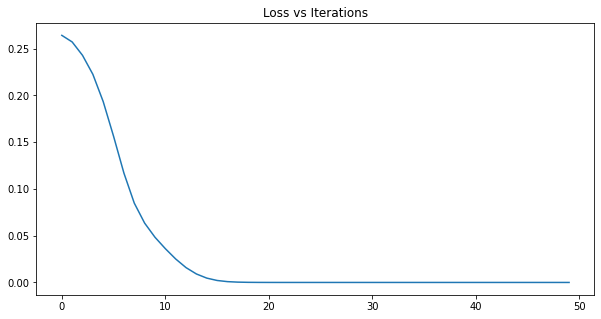

In [ ]:

tutorial_model = torch.load("/home/tutorial_model_default_state")

optimizer = torch.optim.Adam(tutorial_model.parameters(), lr = learning_rate)

print("Below is the loss graph for dataset training session")
train_network(training_data, labels, iterations = 50)

In [ ]:
# Classify our positive test dataset and print the results
classification_1 = tutorial_model(positive_testing_data)
for index, value in enumerate(classification_1.data.tolist()):
  print("P300 Positive Classification {1}: {0:.2f}%".format(value[0] * 100, index + 1))

print()

# Classify our negative test dataset and print the results
classification_2 = tutorial_model(negative_testing_data)
for index, value in enumerate(classification_2.data.tolist()):
  print("P300 Negative Classification {1}: {0:.2f}%".format(value[0] * 100, index + 1))


P300 Positive Classification 1: 0.03%
P300 Positive Classification 2: 100.00%
P300 Positive Classification 3: 97.74%

P300 Negative Classification 1: 0.00%
P300 Negative Classification 2: 99.89%
P300 Negative Classification 3: 99.97%


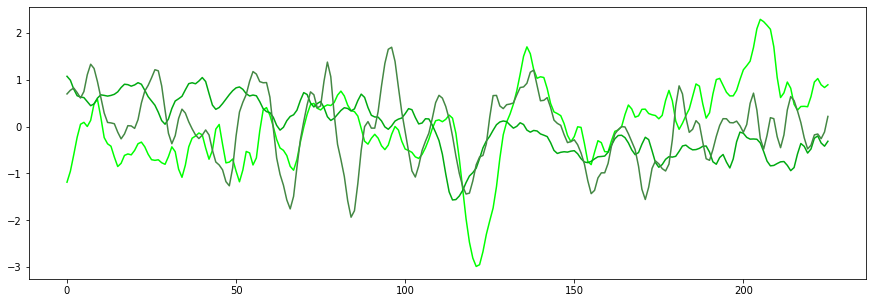

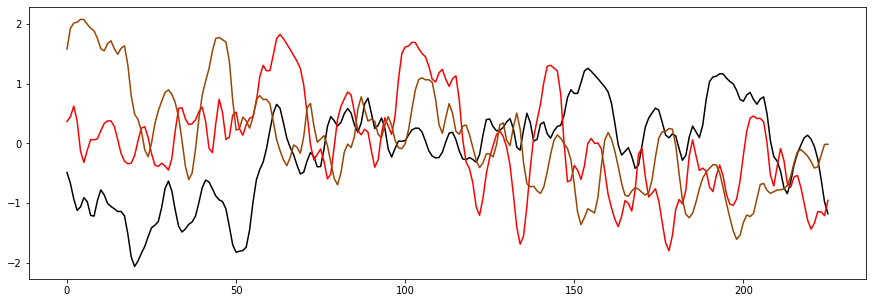

In [ ]:
rcParams['figure.figsize'] = 15, 5

plt.plot(list(range(0, eeg_sample_length)), positive_testing_data[0], color = "#00ff00")
plt.plot(list(range(0, eeg_sample_length)), positive_testing_data[1], color = "#00aa11")
plt.plot(list(range(0, eeg_sample_length)), positive_testing_data[2], color = "#448844")
plt.show()
plt.plot(list(range(0, eeg_sample_length)), negative_testing_data[0], color = "black")
plt.plot(list(range(0, eeg_sample_length)), negative_testing_data[1], color = "r")
plt.plot(list(range(0, eeg_sample_length)), negative_testing_data[2], color = "#994400")
plt.show()

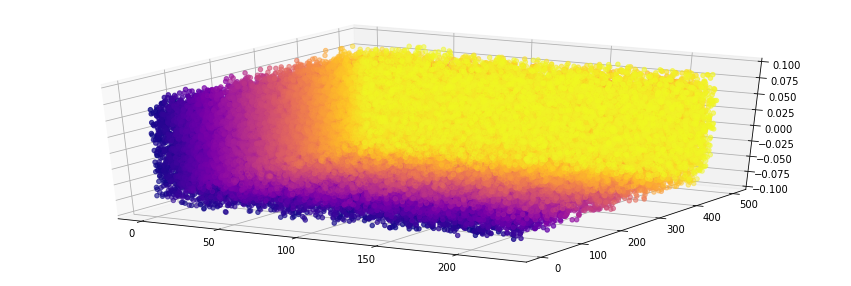

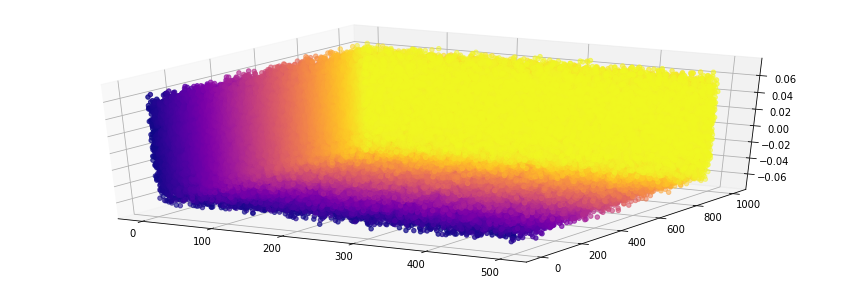

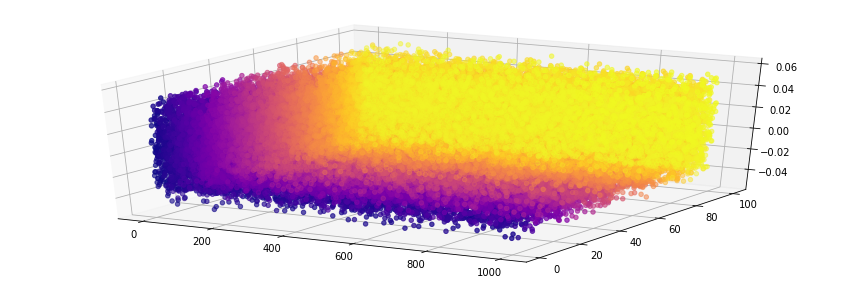

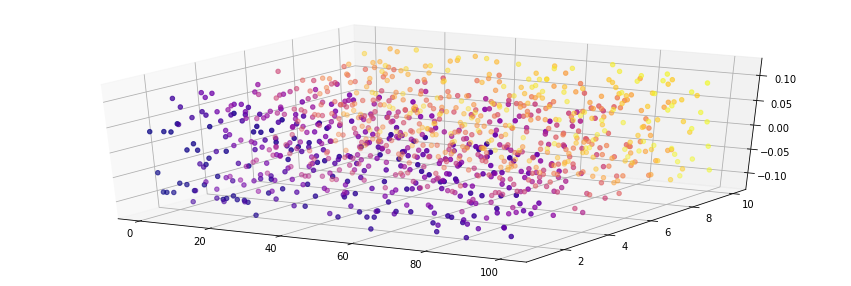

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig1 = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()
fig4 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax2 = fig2.add_subplot(111, projection='3d')
ax3 = fig3.add_subplot(111, projection='3d')
ax4 = fig4.add_subplot(111, projection='3d')

meta_parameters = dict(tutorial_model.named_parameters())
weight_data_input = meta_parameters['Input Linear.weight'].data.detach().numpy()
weight_data_hidden1 = meta_parameters['Hidden Linear.weight'].data.detach().numpy()
weight_data_hidden2 = meta_parameters['Hidden Linear2.weight'].data.detach().numpy()
weight_data_hidden3 = meta_parameters['Hidden Linear3.weight'].data.detach().numpy()
weight_data_output = meta_parameters['Output Linear.weight'].data.detach().numpy()

rcParams['figure.figsize'] = 10, 5

X_1, Y_1 = np.meshgrid(range(1, 227), range(1, 501))
X_2, Y_2 = np.meshgrid(range(1, 501), range(1, 1001))
X_3, Y_3 = np.meshgrid(range(1, 1001), range(1, 101))
X_4, Y_4 = np.meshgrid(range(1, 101), range(1, 11))
X_5, Y_5 = np.meshgrid(range(1, 11), range(1, 1))

ax1.scatter(X_1, Y_1, weight_data_input, c = range(1, 113001), cmap = cm.plasma)
ax2.scatter(X_2, Y_2, weight_data_hidden1, c = range(1, 500001), cmap = cm.plasma)
ax3.scatter(X_3, Y_3, weight_data_hidden2, c = range(1, 100001), cmap = cm.plasma)
ax4.scatter(X_4, Y_4, weight_data_hidden3, c = range(1, 1001), cmap = cm.plasma)
plt.show()

In [ ]:
others_train = others[30:39]
others_test = others[39:42]
rest_of_the_negative_samples = np.concatenate((others[0:30], others[42:208]), axis = 0)
rest_test = torch.tensor(rest_of_the_negative_samples)

rest_testing_data = torch.tensor(rest_test).float()

print("rest of the testing data count: " + str(rest_testing_data.shape[0]))

classification = tutorial_model(rest_testing_data)
total_value = 0
number_correct = 0
for index, value in enumerate(classification.data.tolist()):
  print("P300 Negative Classification {1}: {0:.2f}%".format(value[0] * 100, index + 1))
  total_value += value[0] * 100
  if (value[0] < 0.5):
    number_correct += 1

print()
print("Average Negative Score: {0:.2f}%".format(total_value / 196))
print("Proportion of Non-P300s Classified Correctly: {0:.2f}%".format(float(number_correct) / 196.0 * 100.0))

rest of the testing data count: 196
P300 Negative Classification 1: 0.00%
P300 Negative Classification 2: 97.57%
P300 Negative Classification 3: 100.00%
P300 Negative Classification 4: 10.50%
P300 Negative Classification 5: 99.77%
P300 Negative Classification 6: 1.32%
P300 Negative Classification 7: 3.45%
P300 Negative Classification 8: 0.00%
P300 Negative Classification 9: 0.01%
P300 Negative Classification 10: 0.01%
P300 Negative Classification 11: 100.00%
P300 Negative Classification 12: 51.32%
P300 Negative Classification 13: 100.00%
P300 Negative Classification 14: 0.00%
P300 Negative Classification 15: 0.01%
P300 Negative Classification 16: 87.90%
P300 Negative Classification 17: 100.00%
P300 Negative Classification 18: 63.57%
P300 Negative Classification 19: 100.00%
P300 Negative Classification 20: 27.80%
P300 Negative Classification 21: 0.01%
P300 Negative Classification 22: 0.00%
P300 Negative Classification 23: 99.99%
P300 Negative Classification 24: 100.00%
P300 Negative Cla

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
